# Klasifikasi Data Pertumbuhan Tanaman

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
plantgrowth=pd.read_csv('plant_growth_data.csv')

# Melihat Deskripsi Data

In [3]:
plantgrowth.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


In [4]:
plantgrowth.tail()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
188,sandy,5.652,daily,none,28.0,70.2,0
189,clay,7.528,weekly,chemical,30.5,60.1,1
190,loam,4.934,bi-weekly,none,24.5,61.7,0
191,sandy,8.273,daily,organic,27.9,69.5,1
192,clay,6.732,weekly,none,21.7,56.9,0


In [6]:
plantgrowth.describe()

,Sunlight_Hours,Temperature,Humidity,Growth_Milestone
count,193.000000,193.000000,193.000000,193.000000
mean,6.826484,25.076087,58.098927,0.497409
std,1.599509,5.354170,12.631799,0.501294
min,4.033133,15.200000,30.567682,0.000000
25%,5.477000,20.637095,49.300000,0.000000
50%,6.833290,25.912336,59.182806,0.000000
75%,8.241144,29.757938,69.100000,1.000000
max,9.913903,34.810103,79.648240,1.000000


Dataset "Klasifikasi Data Pertumbuhan Tanaman" ini biasanya melibatkan tugas prediksi atau klasifikasi tahap pertumbuhan tanaman berdasarkan faktor lingkungan dan pengelolaan yang disediakan. Secara khusus, Anda akan bertujuan untuk memprediksi tahap pertumbuhan atau pencapaian yang dicapai oleh tanaman berdasarkan variabel seperti jenis tanah, durasi sinar matahari, frekuensi penyiraman, jenis pupuk, suhu, dan kelembaban. Prediksi ini dapat membantu memahami bagaimana kondisi yang berbeda mempengaruhi pertumbuhan tanaman dan dapat berguna untuk mengoptimalkan praktik pertanian atau manajemen rumah kaca.


Deskripsi dari kolom:

1. Soil_Type (Jenis_Tanah): Jenis atau komposisi tanah tempat tanaman ditanam.

2. Sunlight_Hours (Durasi_Sinar_Matahari): Durasi atau intensitas paparan sinar matahari yang diterima oleh tanaman.

3. Water_Frequency (Frekuensi_Penyiraman): Seberapa sering tanaman disiram, menunjukkan jadwal penyiraman.

4. Fertilizer_Type (Jenis_Pupuk): Jenis pupuk yang digunakan untuk memberikan nutrisi pada tanaman.

5. Temperature (Suhu): Kondisi suhu lingkungan tempat tanaman tumbuh.

6. Humidity (Kelembaban): Tingkat kelembaban atau kandungan air di lingkungan sekitar tanaman.

7. Growth_Milestone (Tahap_Pertumbuhan): Deskripsi atau penanda yang menunjukkan tahap atau kejadian penting dalam proses pertumbuhan tanaman.

Maksud dan Tujuan:

Tujuan dari dataset ini adalah untuk memungkinkan prediksi atau klasifikasi tahap pertumbuhan tanaman berdasarkan berbagai faktor lingkungan dan pengelolaan. Dengan memahami bagaimana variabel-variabel seperti jenis tanah, durasi sinar matahari, frekuensi penyiraman, jenis pupuk, suhu, dan kelembaban mempengaruhi pertumbuhan tanaman, kita dapat mengoptimalkan praktik pertanian atau manajemen rumah kaca. Misalnya, dengan mengetahui kombinasi kondisi yang ideal, kita dapat meningkatkan efisiensi produksi tanaman dan kesehatan tanaman secara keseluruhan.

# Mengidentifikasi Missing Value

In [7]:
plantgrowth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    193 non-null    float64
 2   Water_Frequency   193 non-null    object 
 3   Fertilizer_Type   193 non-null    object 
 4   Temperature       193 non-null    float64
 5   Humidity          193 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB


In [8]:
plantgrowth.isnull()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
188,False,False,False,False,False,False,False
189,False,False,False,False,False,False,False
190,False,False,False,False,False,False,False
191,False,False,False,False,False,False,False


In [9]:
np.sum(plantgrowth.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
Soil_Type,0
Sunlight_Hours,0
Water_Frequency,0
Fertilizer_Type,0
Temperature,0
Humidity,0
Growth_Milestone,0


# Mendeskripsikan Data Berdasarkan Variabel Dependen

Setelah dilakukannya preprocessing data, data kemudian dapat dideskripsikan berdasarkan variabel dependennya yaitu Growth_Milestone atau Tahap_Pertumbuhan.

In [11]:
count_values = plantgrowth['Growth_Milestone'].value_counts()
count_values

,count
Growth_Milestone,
0,97
1,96


Berdasarkan informasi di atas, diperoleh bahwa pertumbuhan yang tidak ideal sebanyak 97 tanaman dan pertumbuhan yang ideal sebanyak 96 tanaman.

In [16]:
import seaborn as sns
import pandas as pd

# Select only numeric columns for correlation calculation
numeric_plantgrowth = plantgrowth.select_dtypes(include=np.number)

# Menghitung korelasi antara setiap variabel dengan 'Growth_Milestone'
correlation_with_Growth_Milestone = numeric_plantgrowth.corr()['Growth_Milestone'].sort_values(ascending=False)

# Menampilkan korelasi setiap variabel dengan 'Growth_Milestone'
print(correlation_with_Growth_Milestone)

Growth_Milestone_Encoded    1.000000
Growth_Milestone            1.000000
Soil_Type_Encoded           0.031354
Temperature                -0.053577
Sunlight_Hours             -0.122212
Humidity                   -0.130328
Name: Growth_Milestone, dtype: float64


Setelah dihitung nilai koreslasi antara variabel independen dengan variabel dependen, diperoleh bahwa tingkat korelasi atau hubungan antara variabel independen dengan variabel dependen cukup lemah dengan kata lain mendekati 0.

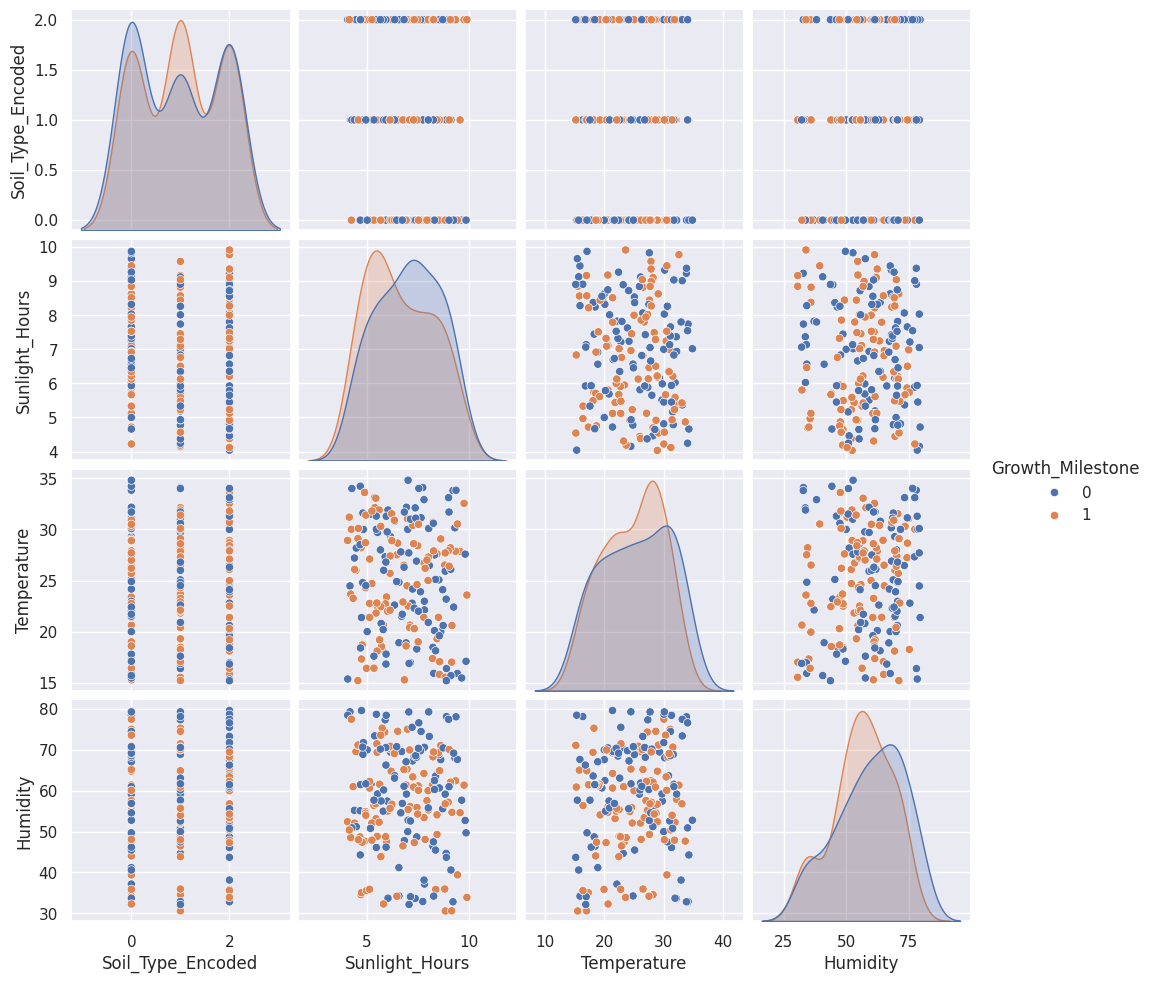

In [17]:
#visualisasi. warna dibedakan berdasarkan potabilitynya apakah air tersebut dapat diminum atau tidak
sns.pairplot(plantgrowth, vars=['Soil_Type_Encoded', 'Sunlight_Hours', 'Temperature', 'Humidity'], hue='Growth_Milestone')

# Memisahkan Variabel Independen (X) dan Dependen (Y)

In [18]:
#memisahkan data menjadi variabel x dan y
X=plantgrowth.drop(['Growth_Milestone'], axis=1)
y=plantgrowth['Growth_Milestone']

# Membagi Data Menjadi Data Training dan Testing

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder  # Import OneHotEncoder

# Create encoders for categorical features
soil_encoder = LabelEncoder()
fertilizer_encoder = LabelEncoder()
water_frequency_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # Create OneHotEncoder for 'Water_Frequency'

# ***Apply encoding and scaling before train_test_split***
# Fit and transform Soil_Type and Fertilizer_Type on the entire dataset X
X['Soil_Type_Encoded'] = soil_encoder.fit_transform(X['Soil_Type'])
X['Fertilizer_Type_Encoded'] = fertilizer_encoder.fit_transform(X['Fertilizer_Type'])

# Fit and transform Water_Frequency using OneHotEncoder on the entire dataset X
water_frequency_encoded = water_frequency_encoder.fit_transform(X[['Water_Frequency']])

# Get feature names from OneHotEncoder
water_frequency_feature_names = water_frequency_encoder.get_feature_names_out(['Water_Frequency'])

# Create DataFrame from encoded Water_Frequency
water_frequency_encoded_df = pd.DataFrame(water_frequency_encoded, columns=water_frequency_feature_names, index=X.index)

# Concatenate encoded Water_Frequency with the rest of the features
X = pd.concat([X, water_frequency_encoded_df], axis=1)

# Drop original categorical columns
X = X.drop(['Soil_Type', 'Fertilizer_Type', 'Water_Frequency'], axis=1)

# Now apply MinMaxScaler to the numerical features for the entire dataset X
X = MinMaxScaler().fit_transform(X)

# Now split the data into training and testing sets
# after encoding and scaling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train)

[[0.26847969 0.20397649 0.63227313 ... 0.         0.         1.        ]
 [0.11258418 0.6631249  0.08134836 ... 1.         0.         0.        ]
 [0.39244305 0.80060773 0.78508313 ... 0.         0.         1.        ]
 ...
 [0.74987923 0.63232713 0.38166473 ... 0.         1.         0.        ]
 [0.90502116 0.64587955 0.64980584 ... 0.         1.         0.        ]
 [0.30265888 0.55073653 0.6037486  ... 1.         0.         0.        ]]


# NAIVE BAYES

In [27]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [28]:
# fit train set pake Gaussian Naive Bayes
nb.fit(X_train, y_train)

GaussianNB()

In [29]:
# compute the accuracy of train set
nb.score(X_train, y_train)

1.0

In [30]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

In [32]:
from sklearn.metrics import accuracy_score

for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

NB accuracy = 1.0000


In [33]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_predict['NB']))
print(classification_report(y_test,y_predict['NB']))

[[20  0]
 [ 0 19]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        19

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



Diperoleh bahwa akurasi klasifikasi menggunakan menggunakan Naive Bayes adalah 1

# K-Nearest Neighbors (KNN)

In [34]:
# a dictionary to define parameters to test in algorithm
from sklearn.neighbors import KNeighborsClassifier # Import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from termcolor import colored

parameters = {
    'n_neighbors' : list(np.arange(3, 50, 2)),
    'weights': ['uniform', 'distance'],
    'p' : [1, 2, 3, 4]
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=knn, cv=10, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters :\n{}'.format(knn_cv.best_params_) )

Tuned hyper parameters :
{'n_neighbors': np.int64(3), 'p': 1, 'weights': 'uniform'}


In [35]:
knn = KNeighborsClassifier(**knn_cv.best_params_).fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

knn_score = round(knn.score(X_test, y_test), 3)
print('KNeighborsClassifier Score : {}'.format(knn_score))

KNeighborsClassifier Score : 1.0


In [36]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))

[[20  0]
 [ 0 19]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        19

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39



Setelah dilakukannya klasifikasi dengan K-Nearest Neighbors atau KNN diperoleh bahwa akurasi klasifikasi menggunakan menggunakan KNN adalah 1

# Kesimpulan

Meskipun kedua algoritma, Naive Bayes dan K-Nearest Neighbors (KNN), menunjukkan akurasi sempurna (1.0) dalam klasifikasi, pemilihan antara keduanya sebaiknya mempertimbangkan karakteristik data dan kebutuhan spesifik aplikasi; Naive Bayes lebih cocok untuk data berdimensi tinggi dan membutuhkan efisiensi komputasi, sementara KNN lebih sesuai untuk data dengan distribusi kompleks dan ketika interpretasi model tidak menjadi prioritas utama.